In [1]:
from keras.utils import plot_model
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims
from matplotlib import pyplot

In [2]:
from keras.applications.vgg16 import VGG16
# Load the model
model = VGG16()
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

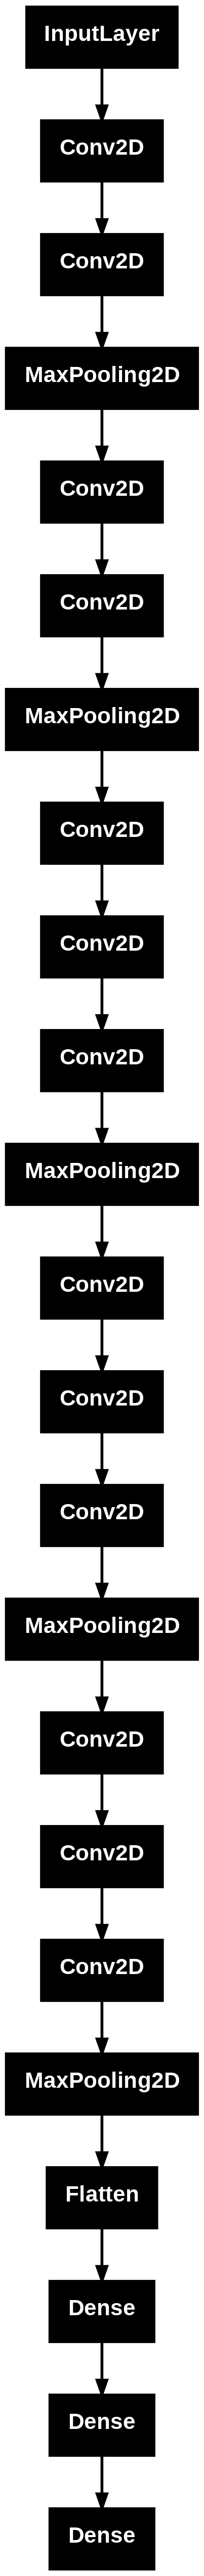

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
for i in range(len(model.layers)):
    # Check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # Get filter weights
    filters, biases = model.layers[i].get_weights()
    print("layer number", i, model.layers[i].name, filters.shape)


layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


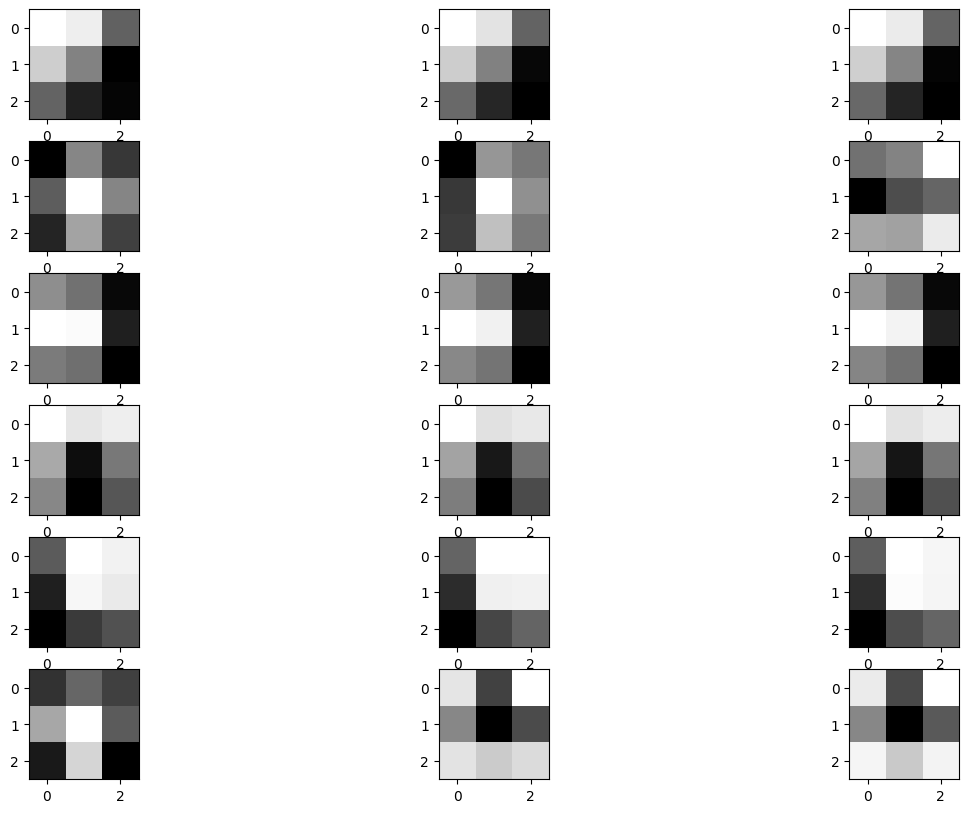

In [5]:
# Retrieve weights from the second hidden layer
filters, bias = model.layers[1].get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # Get the fi"lters
    f = filters[:, :, :, i]
    for j in range(3):
        # Subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters, 3, ix)
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# Plot the filters
pyplot.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


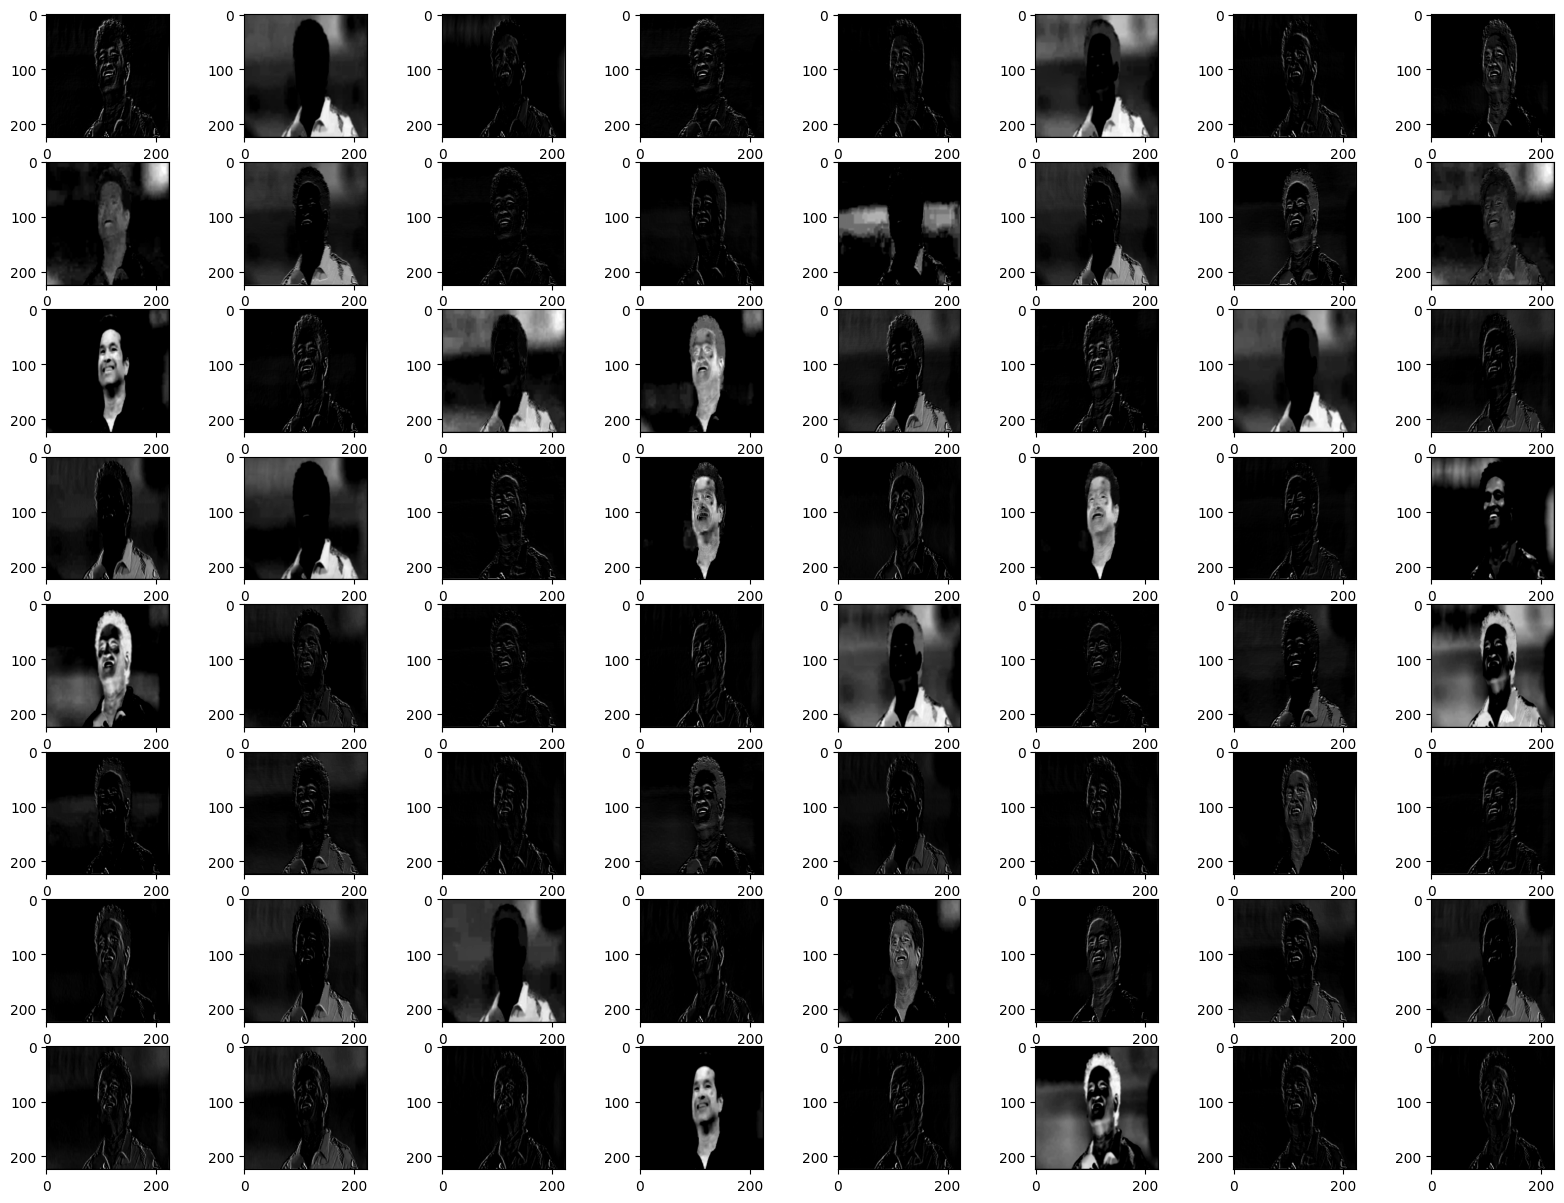

In [6]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

image = load_img("sachin.jpg", target_size=(224, 224))
# Convert the image to an array
image = img_to_array(image)
# Expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

image = preprocess_input(image)

# Calculating feature_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20, 15))
for i in range(1, features.shape[3] + 1):
    pyplot.subplot(8, 8, i)
    pyplot.imshow(features[0, :, :, i-1], cmap='gray')

pyplot.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


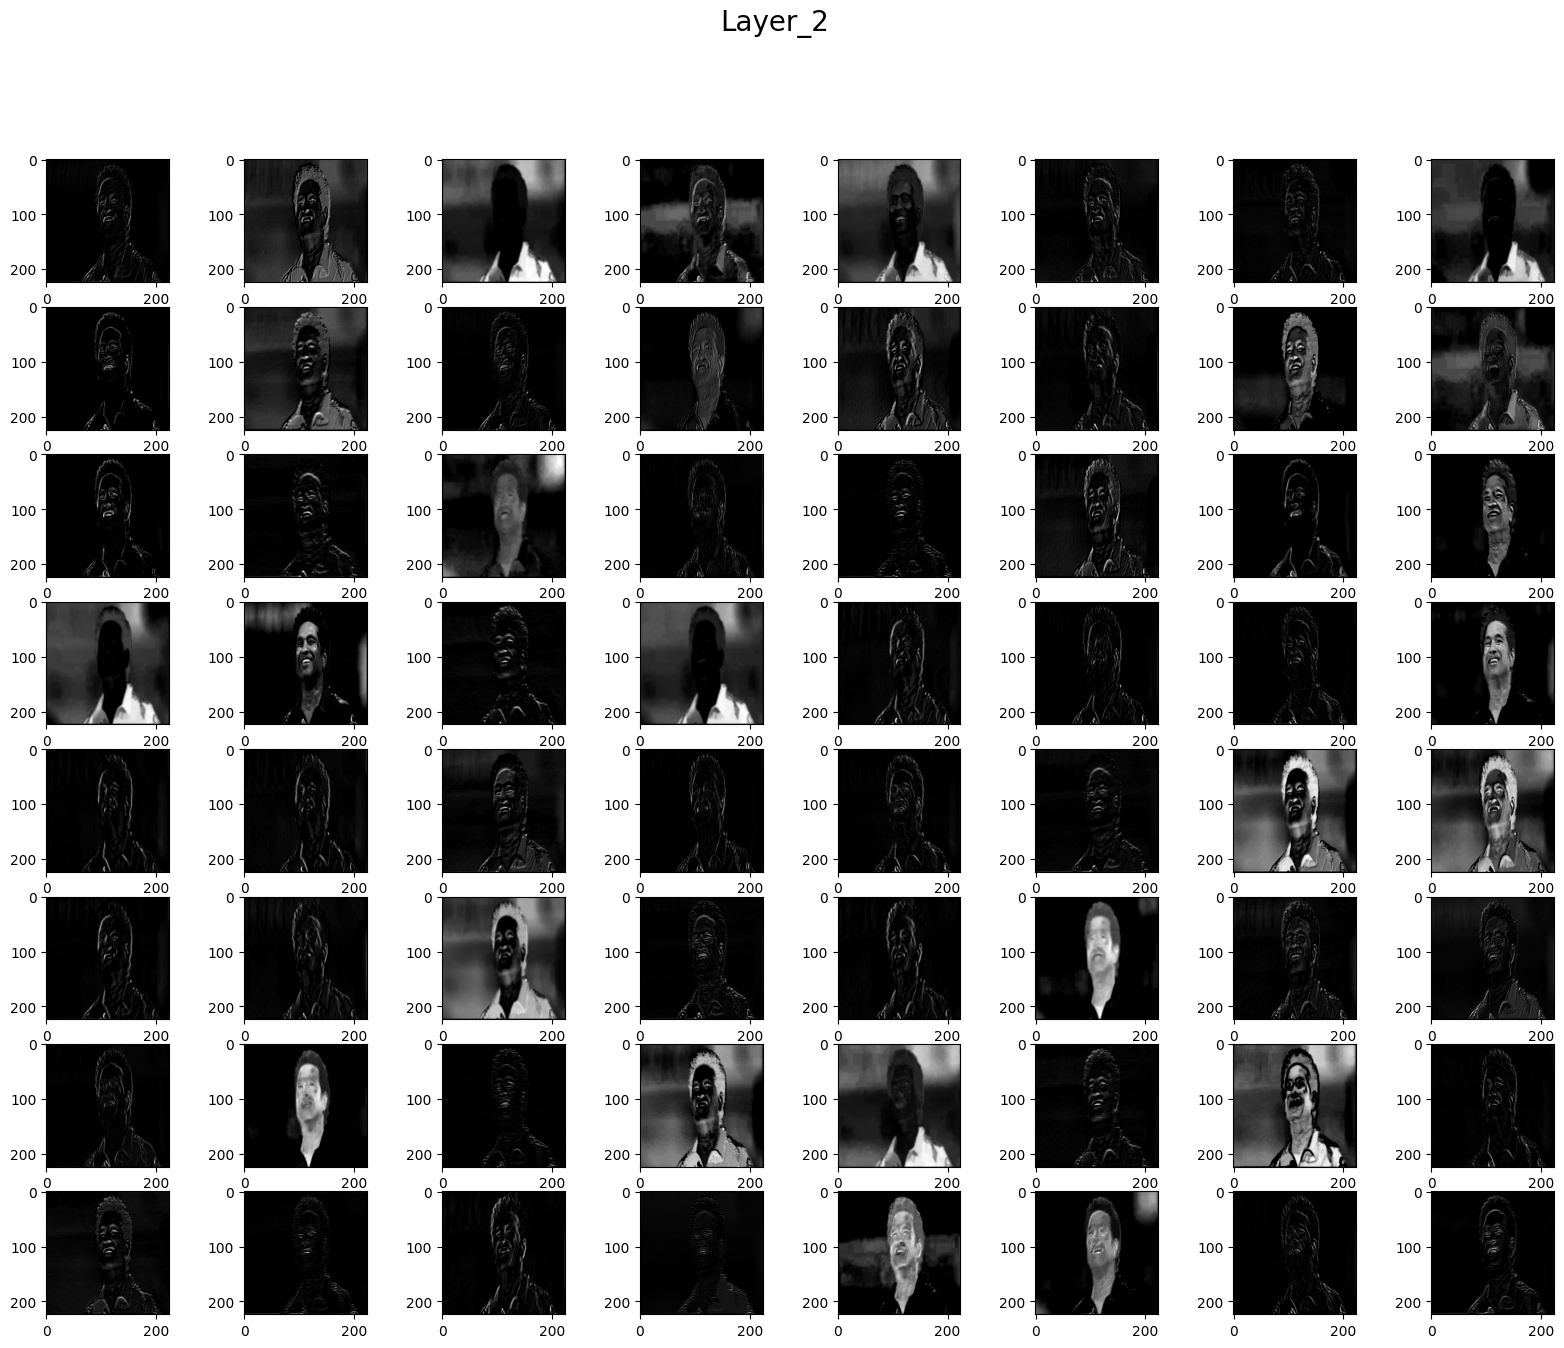

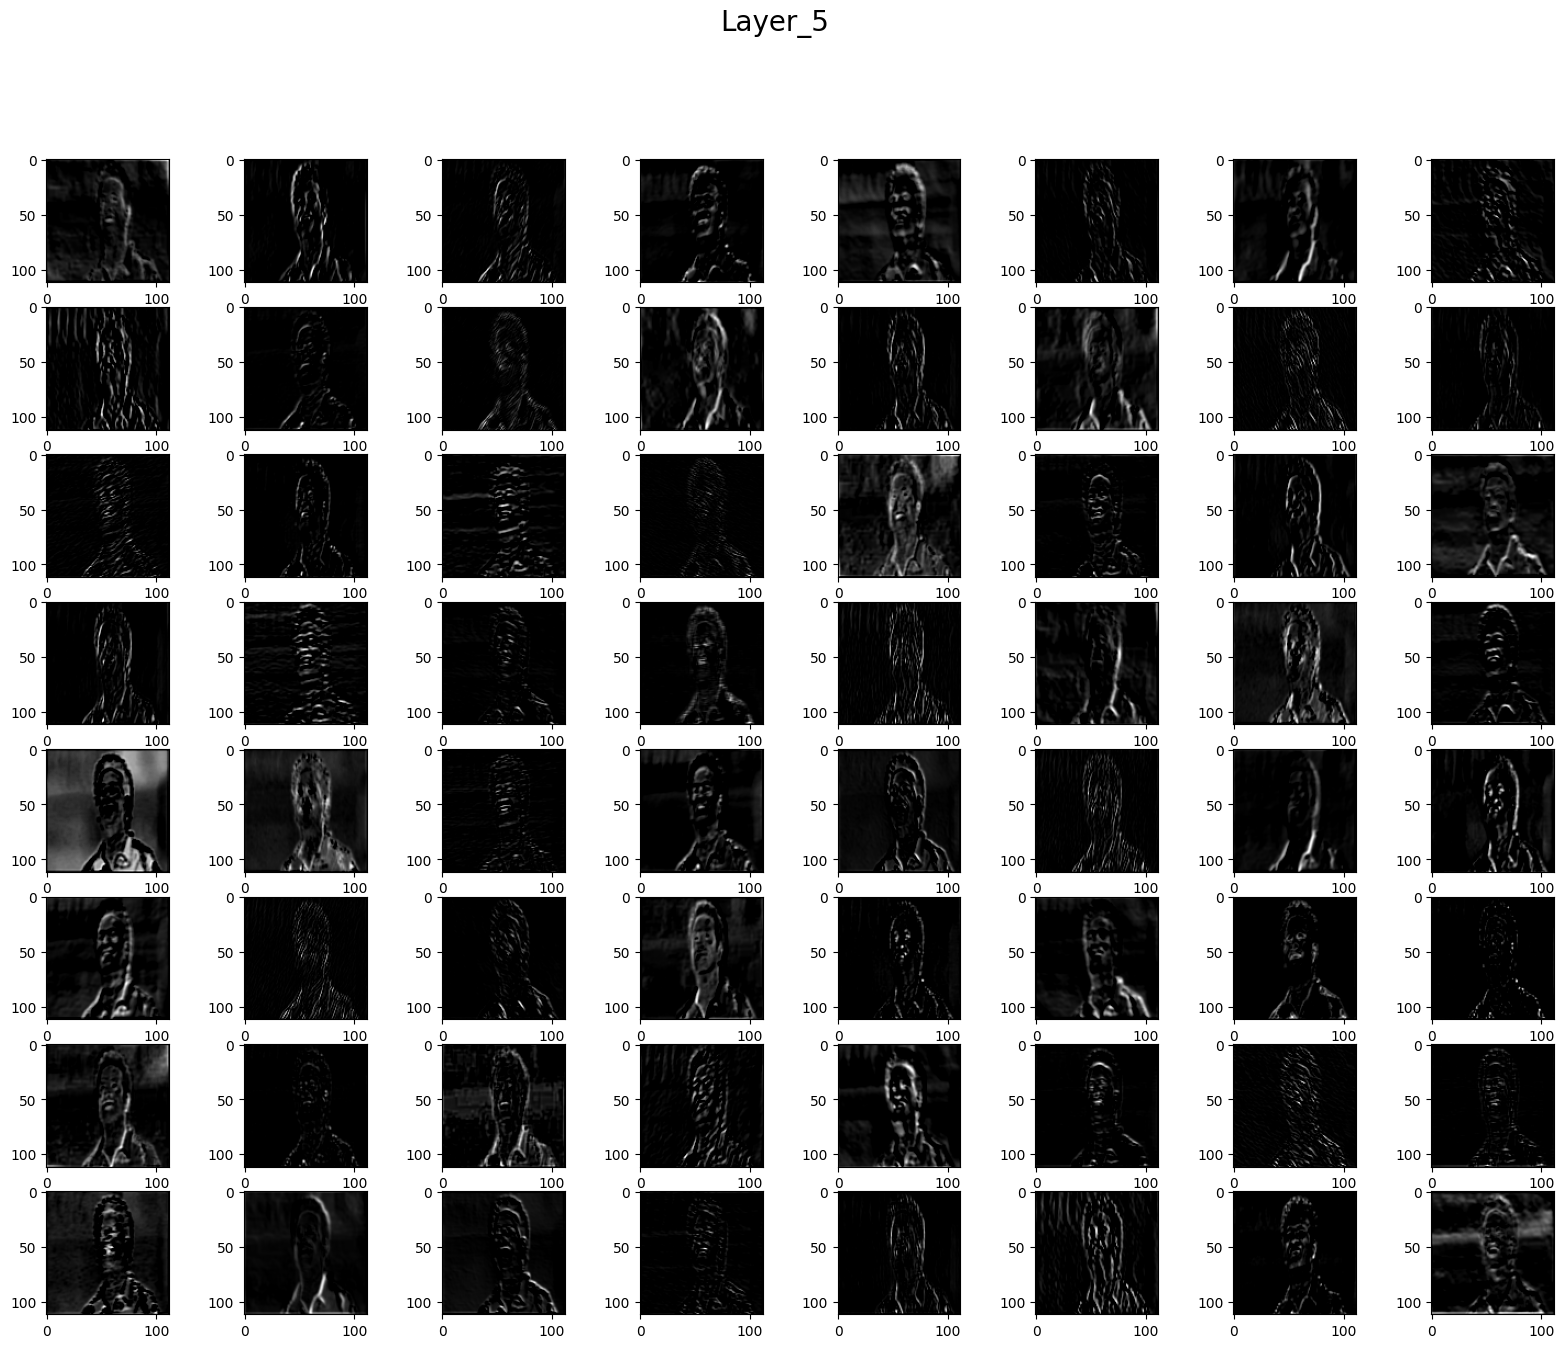

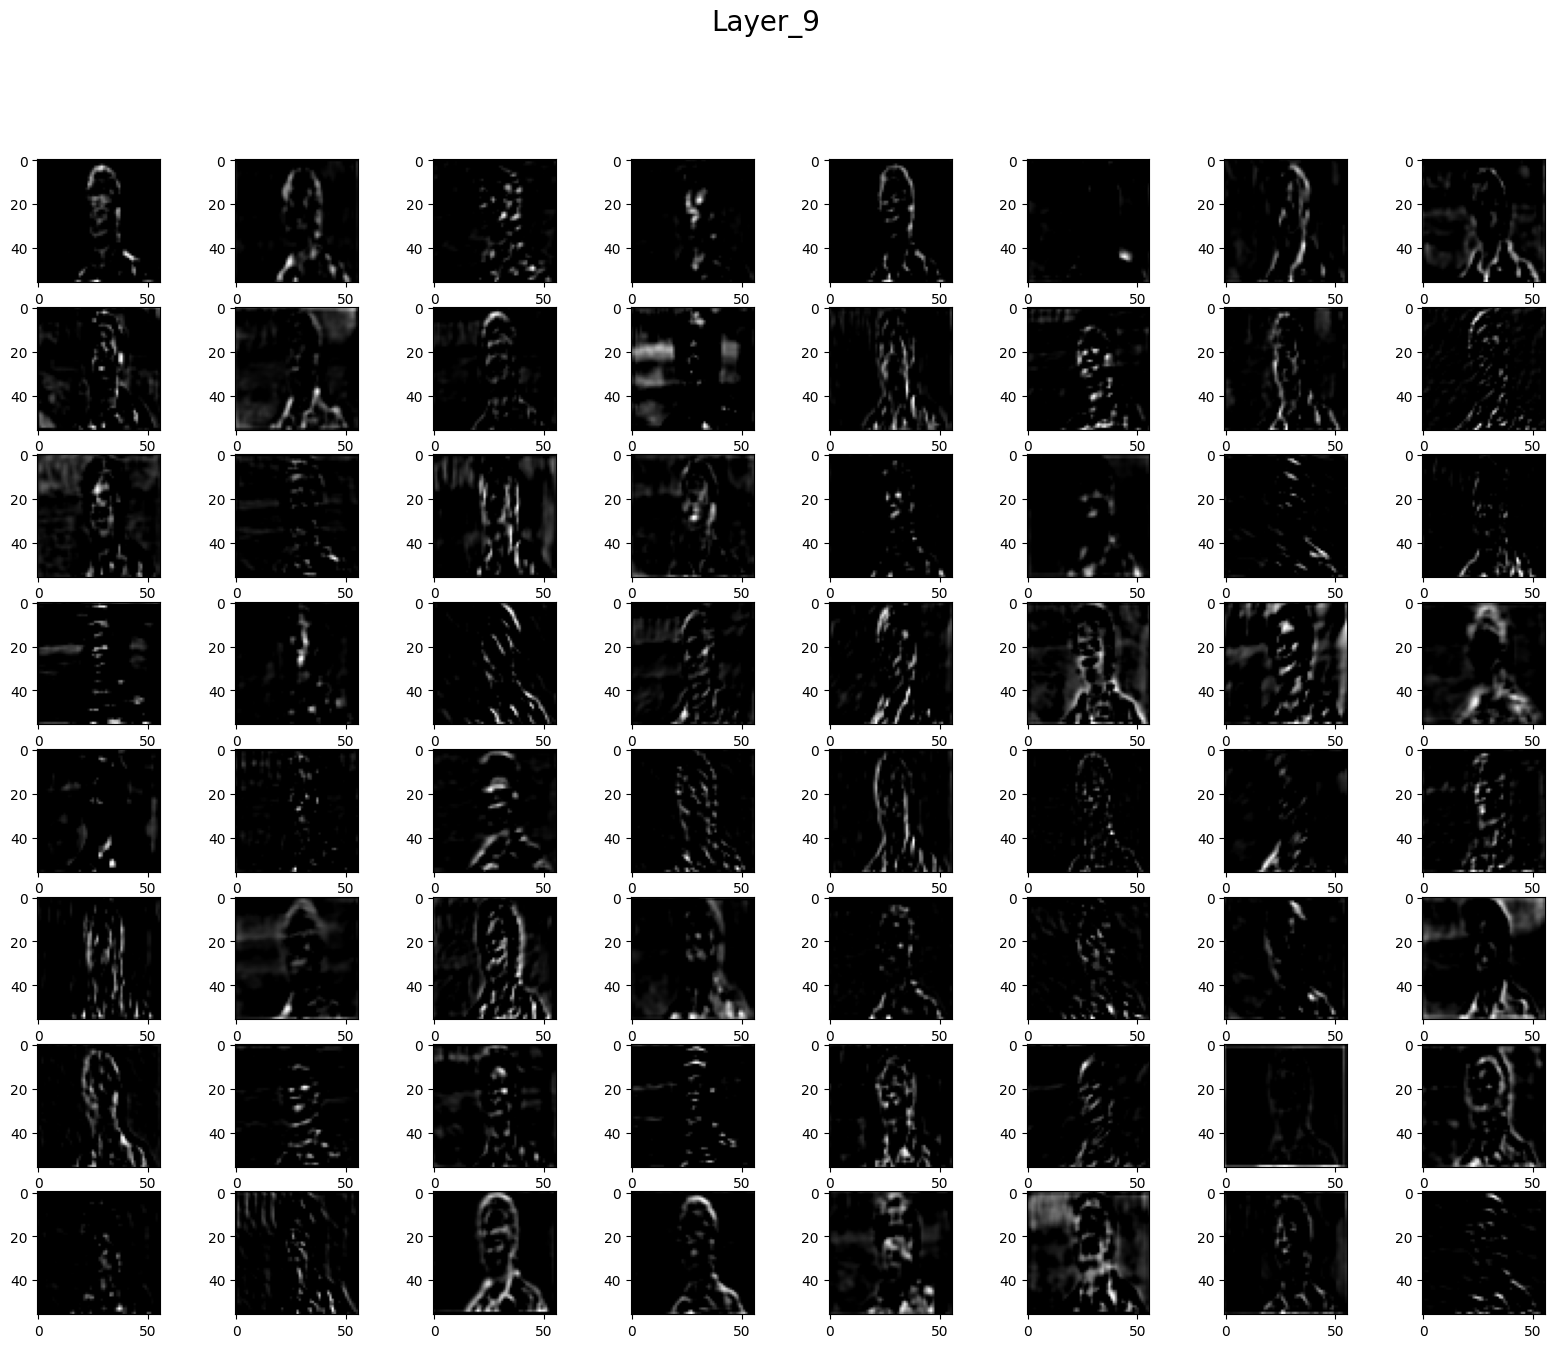

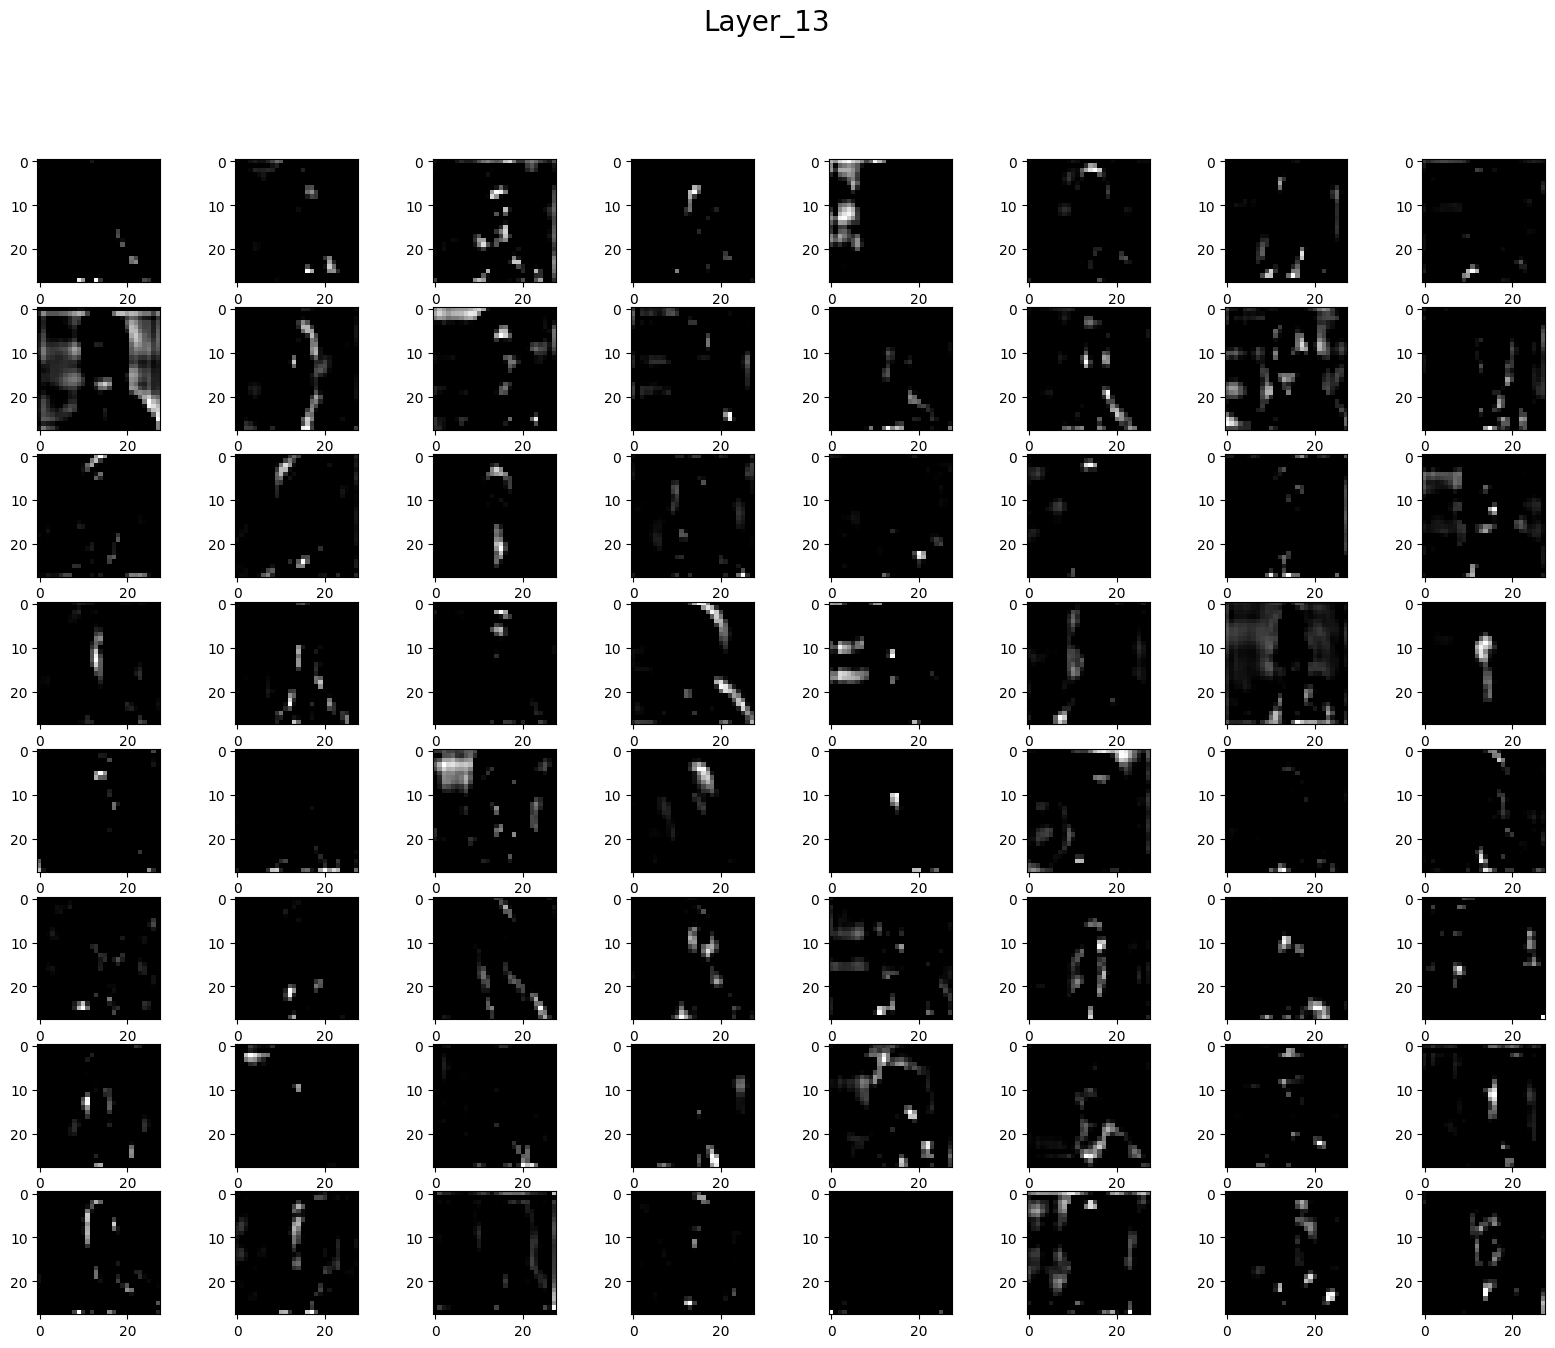

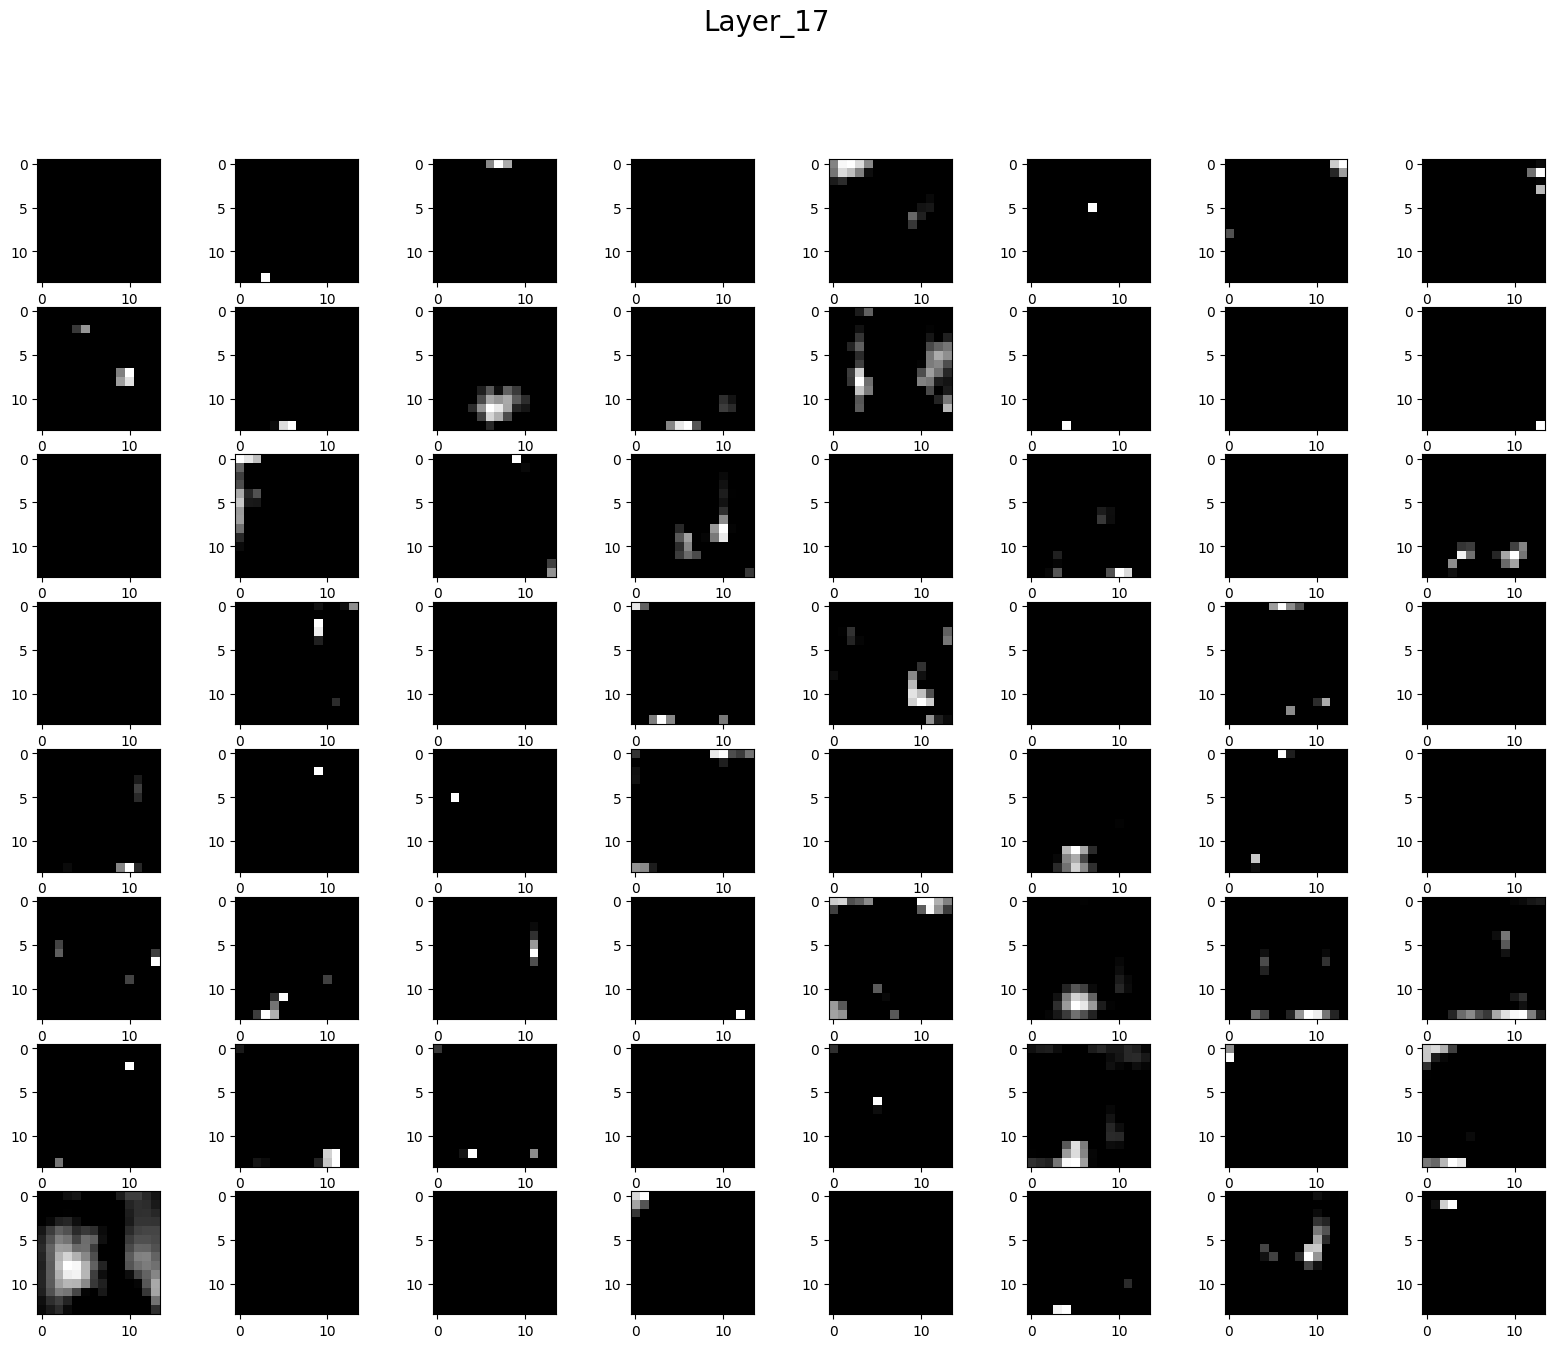

In [7]:
model2 = VGG16()
layer_index = [2, 5, 9, 13, 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model(inputs=model2.inputs, outputs=outputs)

feature_map = model3.predict(image)

for i, fmap in zip(layer_index, feature_map):
    fig = pyplot.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(i), fontsize=20)
    for j in range(1, features.shape[3] + 1):
        pyplot.subplot(8, 8, j)
        pyplot.imshow(fmap[0, :, :, j-1], cmap='gray')

    pyplot.show()
